In [55]:
from pyVHR.analysis.pipeline import Pipeline
import matplotlib.pyplot as plt
import os
import csv
import numpy as np

directory = './datasets/UBFC-RPPG/d1/'
routes = []
real = []

for root, dirs, files in os.walk(directory):
    for file in files:
        if file.split('.')[1] == 'avi':
            vidir = root+'/'+file
            routes.append(vidir)
        if file.split('.')[1] == 'xmp':
            datadir = root+'/'+file
            real.append(datadir)

In [56]:
hrs = []
data_times = []
data_dts = []

for i in range(len(real)):
    gtTrace = []
    gtTime = []
    gtHR = []
    with open(real[i], 'r') as csvfile:
        xmp = csv.reader(csvfile)
        for row in xmp:
            gtTrace.append(float(row[3]))
            gtTime.append(float(row[0])/1000.)
            gtHR.append(float(row[1]))
        hrs.append(gtTrace)
        data_times.append(gtTime)
        data_dts.append(gtHR)

In [3]:
pipe = Pipeline()
times, bpms, uncertainties = [],[],[]

for video in range(len(routes)):
    time_temp, bpm_temp, incert_temp = pipe.run_on_video(routes[video], roi_approach="patches", roi_method="faceparsing")
    times.append(time_temp)
    bpms.append(bpm_temp)
    uncertainties.append(uncertainties)

# CUDA devices:  1
# device number  0 :  NVIDIA GeForce RTX 3060

Processing Video: ./datasets/UBFC-RPPG/d1/after-exercise/vid.avi


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.



BVP extraction with method: cupy_POS

BPM estimation with: welch

...done!

# CUDA devices:  1
# device number  0 :  NVIDIA GeForce RTX 3060

Processing Video: ./datasets/UBFC-RPPG/d1/8-gt/vid.avi

BVP extraction with method: cupy_POS

BPM estimation with: welch

...done!

# CUDA devices:  1
# device number  0 :  NVIDIA GeForce RTX 3060

Processing Video: ./datasets/UBFC-RPPG/d1/10-gt/vid.avi

BVP extraction with method: cupy_POS

BPM estimation with: welch

...done!

# CUDA devices:  1
# device number  0 :  NVIDIA GeForce RTX 3060

Processing Video: ./datasets/UBFC-RPPG/d1/11-gt/vid.avi

BVP extraction with method: cupy_POS

BPM estimation with: welch

...done!

# CUDA devices:  1
# device number  0 :  NVIDIA GeForce RTX 3060

Processing Video: ./datasets/UBFC-RPPG/d1/7-gt/vid.avi

BVP extraction with method: cupy_POS

BPM estimation with: welch

...done!

# CUDA devices:  1
# device number  0 :  NVIDIA GeForce RTX 3060

Processing Video: ./datasets/UBFC-RPPG/d1/12-gt/vid.avi

BVP ex

In [8]:
print("Before, figure default size is: ", plt.rcParams["figure.figsize"])
plt.rcParams["figure.figsize"] = (20, 10)
print("After, figure default size is: ", plt.rcParams["figure.figsize"])

Before, figure default size is:  [6.0, 4.0]
After, figure default size is:  [20.0, 10.0]


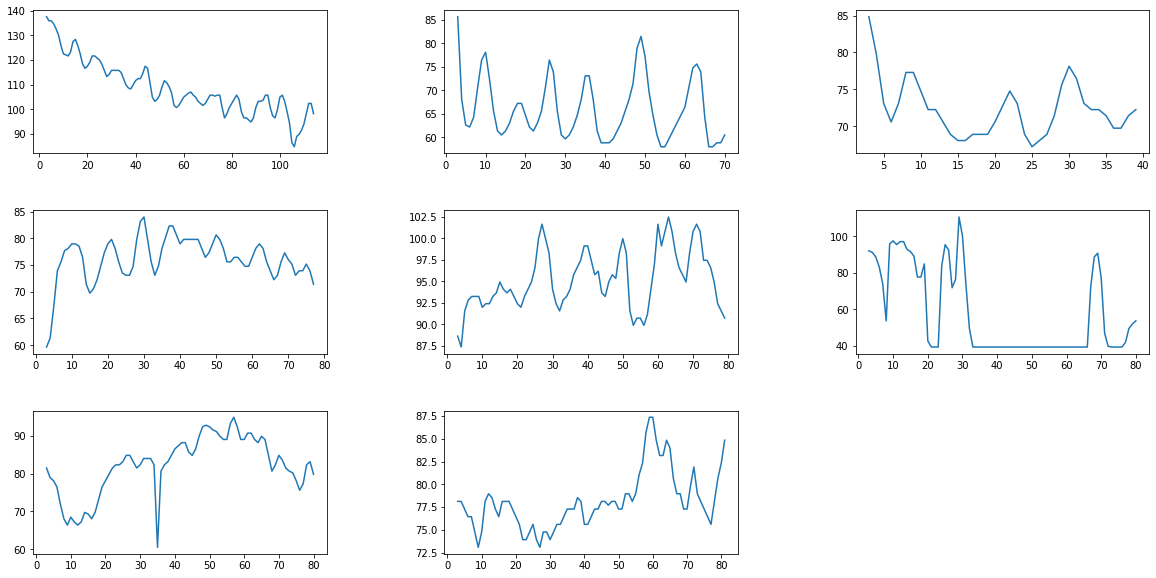

In [9]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1,len(routes)+1):
    ax = fig.add_subplot(3, 3, i)
    ax.plot(times[i-1],bpms[i-1])
    #ax.fill_between(times[i-1], bpms[i-1]-uncertainties[i-1], bpms[i-1]+uncertainties[i-1], alpha=0.2)

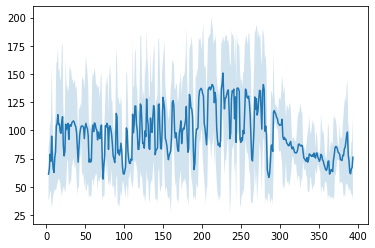

In [15]:
plt.figure()
plt.plot(time, BPM)
plt.fill_between(time, BPM-uncertainty, BPM+uncertainty, alpha=0.2)
plt.show()

In [70]:
for i in range(8):
    print(len(times[i]), len(hrs[i]))

112 7304
68 4580
37 2662
75 4991
77 5128
78 5193
78 5192
79 5223


## Comparativa 

In [ ]:
import pyVHR as vhr
import numpy as np

from pyVHR.analysis.pipeline import Pipeline
vhr.plot.VisualizeParams.renderer = 'notebook'  # colab or 'notebook'
dataset_name = 'lgi_ppgi'          # the name of the python class handling it 
video_DIR = '../datasets/LGI-PPGI/'  # dir containing videos
BVP_DIR = '../datasets/LGI-PPGI/'    # dir containing BVPs GT

dataset = vhr.datasets.datasetFactory(dataset_name, videodataDIR=video_DIR, BVPdataDIR=BVP_DIR)
allvideo = dataset.videoFilenames
'''
for v in range(len(allvideo)):
  print(v, allvideo[v])
'''
pipeline = Pipeline()
time, BPM, uncertainty = pipeline.run_on_video(allvideo[0], roi_approach="holistic", roi_method="convexhull")

video_1 = [BPM, time, "Alex"]
video_2 = [BPM2, time2, "Alex 1"]

vhr.plot.visualize_BPMs([video_1,video_2])
